# Reductions

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx)   and [graphviz python](https://anaconda.org/conda-forge/python-graphviz) anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the latter package.)

Please run the utility code at the bottom of this notebook first.

_Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

__Announcements:__ New survey at [http://tiny.cc/cs121survey](http://tiny.cc/cs121survey), last two lectures' material. 

In [119]:
%%html
<iframe src="http://free.timeanddate.com/countdown/i5vf6j5p/n43/cf11/cm0/cu4/ct1/cs1/ca0/co0/cr0/ss0/cac09f/cpc09f/pct/tcfff/fs100/szw576/szh243/iso2017-10-26T10:07:00" allowTransparency="true" frameborder="0" width="177" height="35"></iframe>'

In [ ]:
reductions = Digraph()
reductions.edges([("3SAT","Quadratic Equations"),("3SAT","Independent Set"),("3SAT","Longest Path"),("Independent Set","Maximum Cut")])

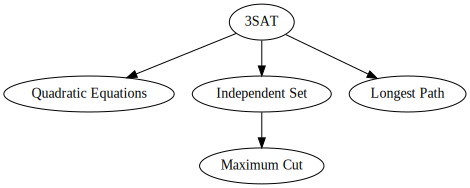

In [120]:
reductions

__Def:__ $F \leq_p G$ if there is poly-time $R:\{0,1\}^* \rightarrow \{0,1\}^*$ such that $F(x)=G(R(x))$ for every $x\in \{0,1\}^*$.

"$F$ is no harder than $G$"

__Problem:__ Prove that $F \leq_p G$ and $G \leq_p H$ implies that $F \leq_P H$

__Proof:__ If $F(x)=G(R(x))$ and $G(y)=H(R'(y))$ then $F(x)=H(R'(R(x)))$

__Problem:__ Let $SHORTPATH(G,s,t,k)=1$ iff there is path $s \leadsto t$ of langth $\leq k$.

Prove that $SHORTPATH \leq_p 3SAT$

## 3SAT 

_"The mother of all optimization problems"_

__Input:__ 3CNF formula:  AND of $m$ _clauses_.  

Clause = OR of three _literals_

Literal = variable or its negation.

__Goal:__ Output 1 iif formula _satisfiable_.

In [121]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [ ]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-int(x[int(v[2:])])  if v[0]=="¬" else int(x[int(v[1:])]))
    
    for (v0,v1,v2) in getclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res
    

# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find('x'+str(n))>= 0: return n+1
    raise Exception


In [ ]:
numvars(φ)

__Question:__ What is the value of φ on the assignment $x=0101$? __a__ True, __b__ False

In [122]:
evalcnf(φ,"0101")

False

__Question:__ Is φ satisfiable?

In [123]:
evalcnf(φ,"1000")

True

## Clique problem

__Input:__ Graph $G=(V,E)$ and $k\in\mathbb{N}$

__Output:__ $1$ if there is $S \subseteq V$ with $|S| \geq k$ s.t. $\{i,j \} \in E$ for every $i \neq j \in S$.

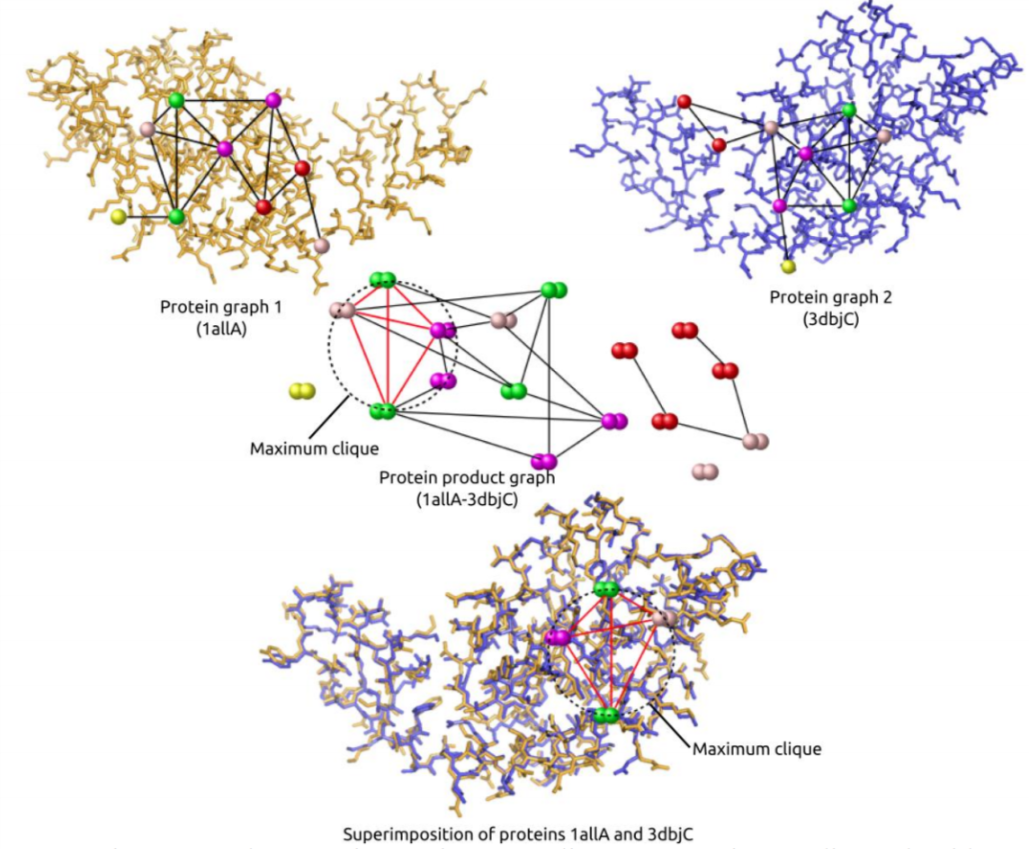

In [124]:
Image('clique.png' ,width=500)

__Question:__ Is $3SAT \leq_p CLIQUE$ __a__ Yes __b__ No ,  __c__ I don't know 

$CLIQUE(G,k)=ISET(\overline{G},k)$

(_independent set_:  $S$ containing no edges)

## 3SAT to independent set

__Thm:__ $3SAT \leq_p IS$

To prove need to show poly-time $R$ s.t. $R(\varphi)=G$ s.t. 

* __completeness:__ If $\varphi$ satisfiable then there is i.set of $G$ of size $\geq k$

* __soundness:__ If there is an i.set of $G$ with size $\geq k$ then $\varphi$ satisfiable.

__Pf:__ $2n$ vertices  "$x_i=0$" and "$x_i=1$"

$3m$ vertices: $(x_7$ $\vee$ $\neg x_{10}$ $\vee$ $x_{12})$ maps to triangle "$x_7 \neq 0$", "$x_{10} \neq 1$", "$x_{12}\neq 0$"

Edges between _inconsistent_ vertices

assignment $\Leftrightarrow$ independent set

In [ ]:
# Reduction φ ↦ G
def SAT2IS_(φ):
    n = numvars(φ) 
    G =Graph(engine='neato')
    
    # add pairs "xi=0" and "xi=1"
    for i in range(n): G.edge("x"+str(i)+"=0","x"+str(i)+"=1")
        
    # map "x7" in clause 5 to "5)x7≠0", "¬x12" in clause 6 to "6)x12≠1"
    def nodename(v,c): return str(c)+')'+(v[1:]+"≠1" if v[0]=="¬" else v+"≠0")
    
    #map "5)x7≠0" to its neighbor "x7=0"
    def neighbor(n):   return n.split(')')[1].split('≠')[0]+"="+n[-1]
    
    c = 0
    for C in getclauses(φ):
        (u,v,w) = (nodename(C[0],c),nodename(C[1],c),nodename(C[2],c))
        
        # add triangle of clause
        G.edges([(u,v),(v,w),(u,w)])
        
        # connect each vertex to inconsistent neighbor
        G.edges([(u,neighbor(u)),(v,neighbor(v)),(w,neighbor(w))])
        c += 1
    
    return G

In [ ]:
SAT2IS_(φ)

In [ ]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
    n = numvars(φ) 
    G =Graph(engine='neato')
    for i in range(n):
        u = "x"+str(i)+"=0"
        v = "x"+str(i)+"=1"
        G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        G.node(v,style='filled',fillcolor=('red' if x and x[i]=="1" else 'green'))
        if x: S.append(u if x[i]=='0' else v)
        G.edge(u,v,len='1')
    
    def nodename(v):
        return ((v[1:],"≠1") if v[0]=="¬" else (v,"≠0"))
    
    cnum = 0
    for C in getclauses(φ):
        lastv = None
        found = False
        for v in C:
            (var,cond) = nodename(v)
            name = str(cnum)+")"+var+cond
            color = 'lightblue'
            if x and (not found) and x[int(var[1:])]!=cond[1]:
                found = True
                color = 'red'
                S.append(name)
            G.node(name,label=var+cond,style='filled',fillcolor=color)
            if lastv: G.edge(lastv,name,len='1')
            
            lastv = name
            G.edge(name,var+"="+cond[1],len='1.7')
        G.edge(str(cnum)+")"+"".join(nodename(C[0])),lastv,len='1')
        cnum += 1
    
    return (G if not x else (G,S))

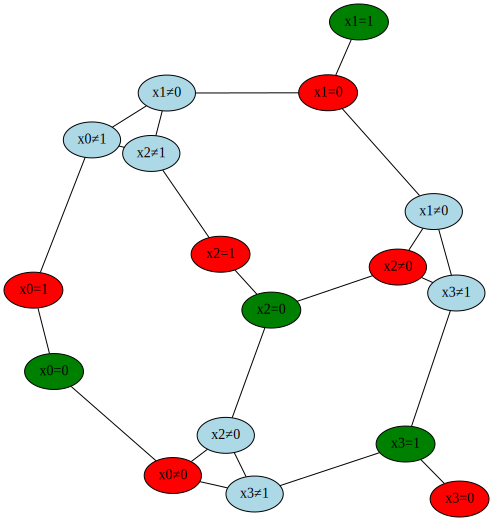

In [129]:
SAT2IS(φ,"1010")[0]

__Completeness:__  $\exists$ sat assign. $\varphi$ $\Rightarrow$ $\exists$ $n+m$ iset in $G$ 

__Pf:__ One vertex out of  pair $x_i=0$, $x_i=1$, one vertex out of triangle $x_i \neq a$, $x_j \neq b$, $x_k \neq c$

__Soundness:__ $\exists$ $n+m$ iset in $G$ $\Rightarrow$ $\exists$ sat assign. $\varphi$ 

__Pf:__ $n+m$ iset must have one vtx per pair, one vtx per triangle

If "$x_i=a$" in  $I$ then set $x_i=a$.

$x$ must satisfy all clauses.

## Independent Set to Maximum Cut

__Def:__ If $G=(V,E)$ and $S \subseteq V$ then $cut(S)$ is number of edges $\{u,v\}$ with $u\in S$ and $v\not\in S$.

$MAXCUT(G,k) = 1$ iff there is $S$ with $cut(S) \geq k$.

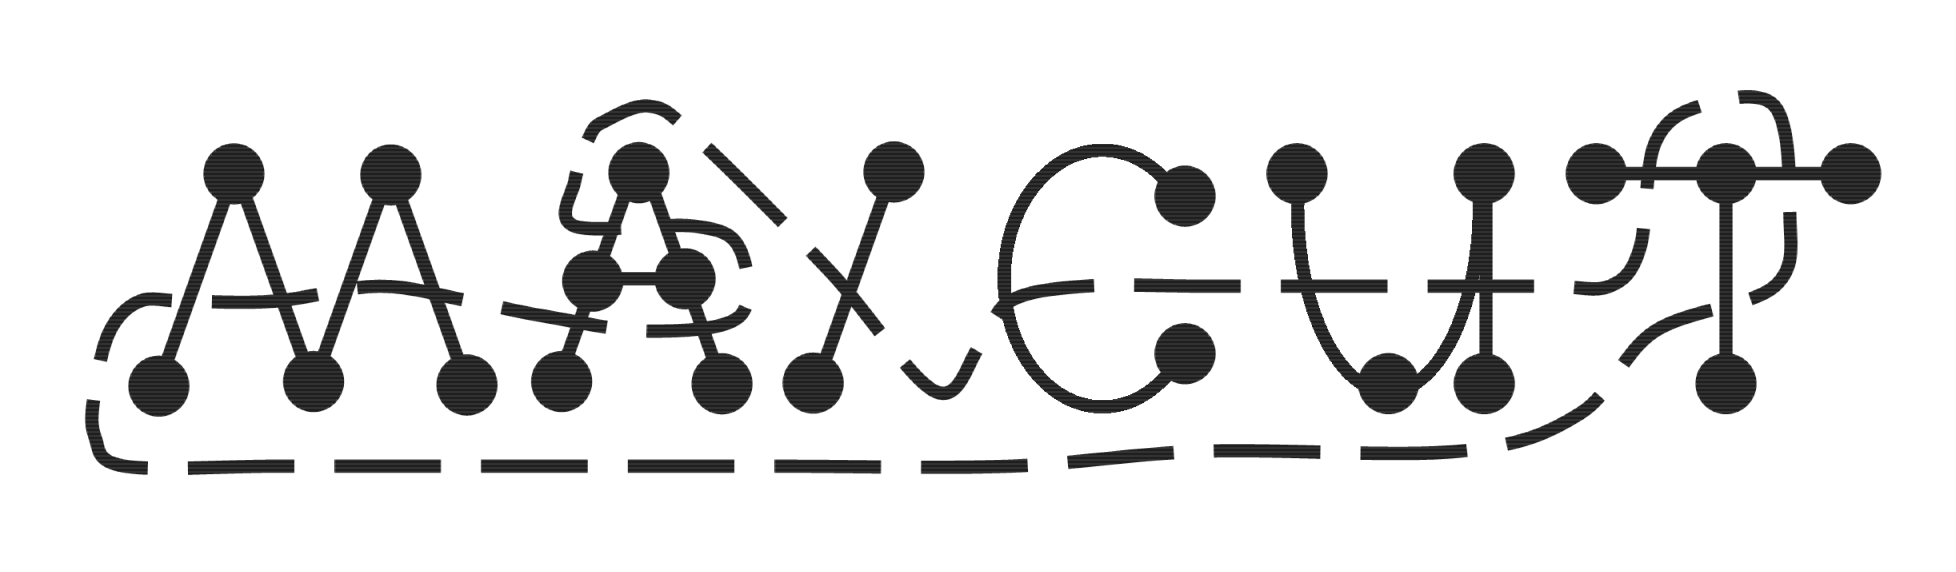

In [130]:
Image('maxcut.png')

__Thm:__ $ISET \leq_p MAXCUT$

__Corollary:__ $3SAT \leq_p MAXCUT$

__Proof:__ $G=(V,E)$  maps to $H$ with: 

* Special _source_ vertex

* $n$ vertices corresponding to $V$

* $2m$ extra vertices $e_0,e_1$ for each edge

__Edges:__ $\{s^*,v \}$ for all $v\in V$, $5$ edge gadget for every $e\in E$.

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

In [ ]:
# Reduction IS to MAXCUT
def IS2MAXCUT_(G):
    G =nxgraph(G)
    H =Graph(engine='sfdp')
    s ="source"
    H.node(s) # create source node
    
    for v in G.nodes(): H.edge(s,v)
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        # add gadget
        H.edges([(s,g1),(s,g2),(g1,g2),(u,g1),(v,g2)]) 
        j +=1
        
    
    return H

In [ ]:
IS2MAXCUT_(SAT2IS(φ))

In [ ]:
# same reduction as above but handling colors and showing the resulting cut when the original graph has independent set
def IS2MAXCUT(G,I=[]):
    G =nxgraph(G)
    S = []
    H =Graph(engine='sfdp')
    H.node("source",style='filled',fillcolor='blue')
    S.append("source")
    for v in G.nodes():
        color = ('red' if I and v in I else 'lightblue')
        H.node(v,style='filled',fillcolor=color)
        ecol = 'black'
        pwidth = '1'
        if I and v in I: 
            S.append(v)
            ecol = 'red'
            pwidth = '2'
        H.edge("source",v,len="2",color=ecol,penwidth=pwidth) 
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        c1 = 'green'
        c2 = 'green'
        if I and (not u in I):
            c1 = 'red'
            S.append(g1)
        if I and (not v in I):
            c2 = 'red'
            S.append(g2)
        gadget = Graph("gadget"+str(j))
        gadget.node(g1,style='filled',fillcolor=c1)
        gadget.node(g2,style='filled',fillcolor=c2)
        gadget.edge(g1,g2,len="1",color=('red' if (g1 in S) != (g2 in I) else 'black'), penwidth=('2' if (g1 in S) != (g2 in I) else '1'))
        gadget.edge(u,g1,len="1", color=('red' if (g1 in S) != (u in I) else 'black'),penwidth =('2' if (g1 in S) != (u in S) else '1')  )
        gadget.edge(v,g2,len="1", color=('red' if (g2 in S) != (v in I) else 'black'),penwidth= ('2' if (g2 in S) != (v in S) else '1') )
        
        H.subgraph(gadget)
        H.edge(g1,"source",len="2.5",color=('red' if (g1 in S)  else 'black'),penwidth=('2' if (g1 in S)  else '1'))
        H.edge(g2,"source",len="2.5",color=('red' if (g2 in S)  else 'black'),penwidth= ('2' if (g2 in S)  else '1') )
        j +=1
        
    
    return (H,S) if I else H

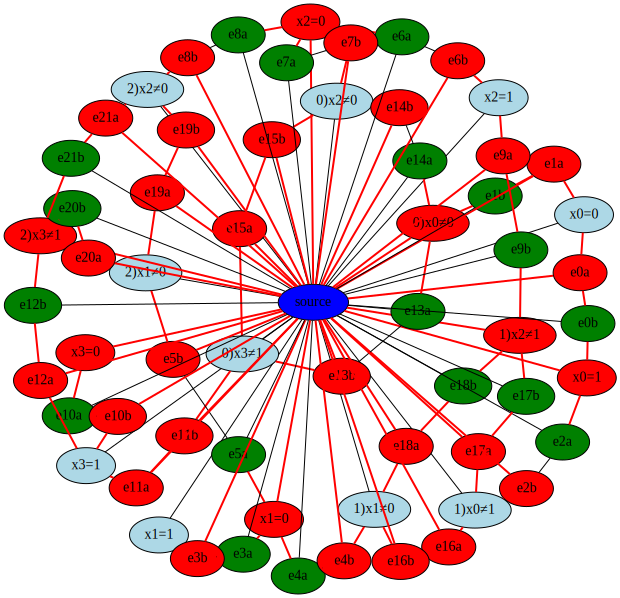

In [132]:
IS2MAXCUT(*SAT2IS(φ,"1000"))[0]

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

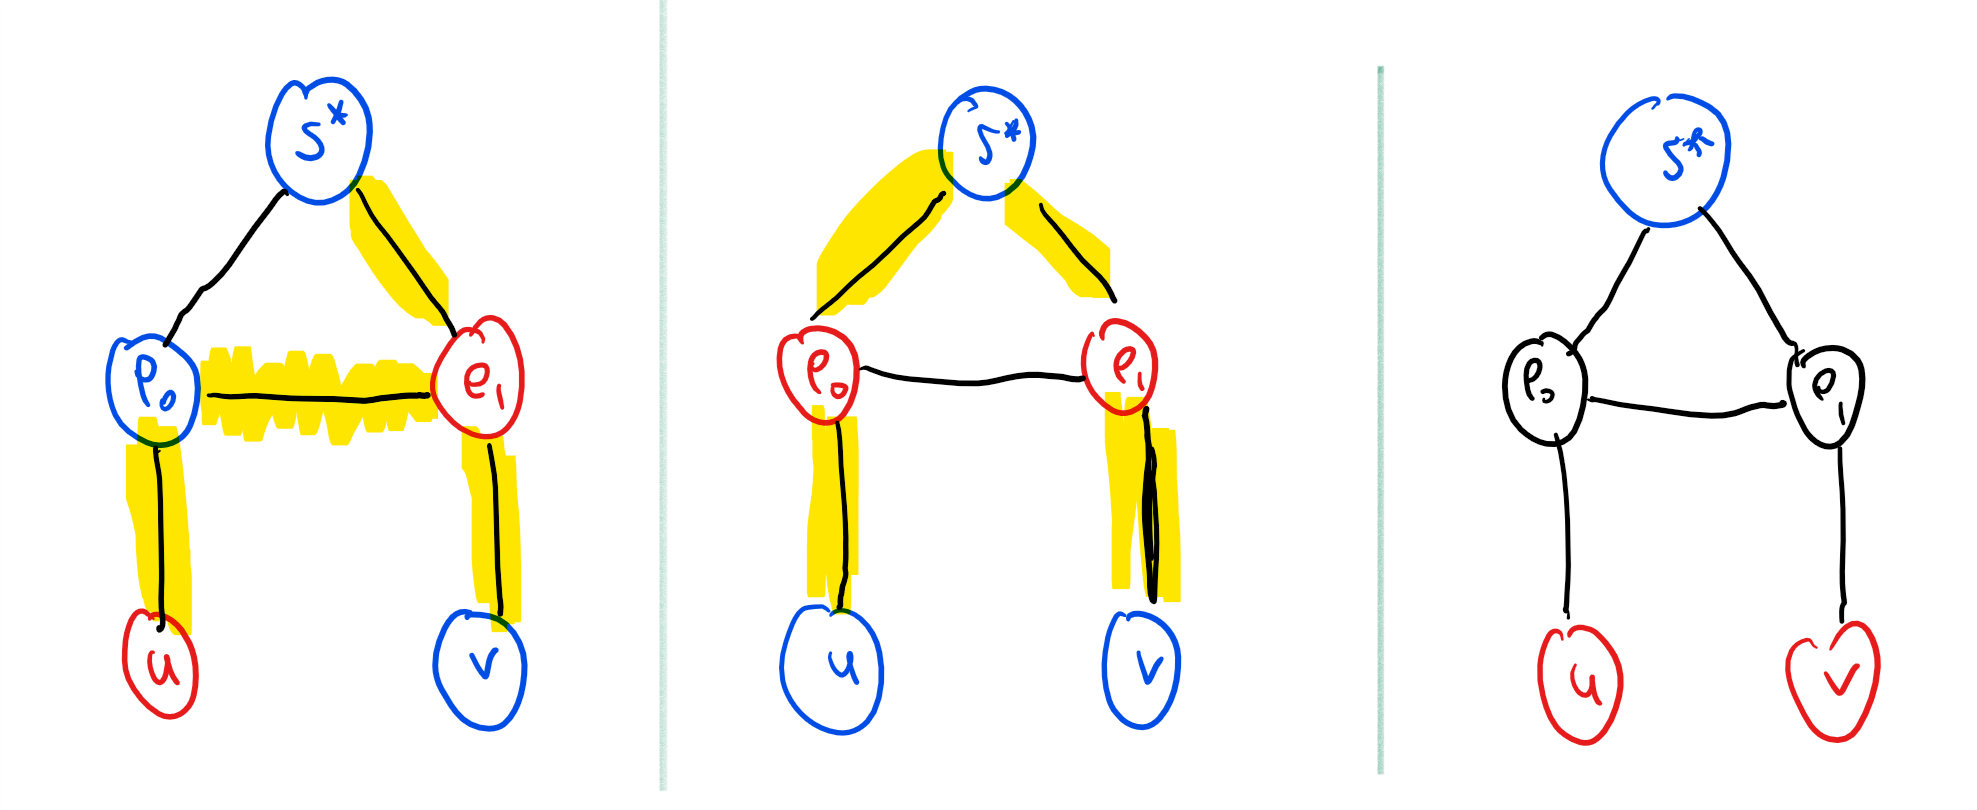

In [133]:
Image('ISETtoMAXCUT.png')

__Claim:__ $H$ has cut of $k+4m$ edges $\Rightarrow$ $G$ has set $I$ with $|I|-|E(I,I)| \geq k$.

## SIZE vs TIME

__Thm:__ For every $F \in TIME_{++}(T(n))$ and large enough $n$, $F_n \in SIZE(T(n))$

($F_n$ = restriction of $F$ to $\{0,1\}^n$)

__Corollary:__ For every $F \in TIME_{<<}(T(n))$ and large enough $n$, $F_n \in SIZE(T(n)^5)$ 

__Thm:__ For every $F \in TIME_{++}(T(n))$ and large enough $n$, $F_n \in SIZE(T(n))$

($F_n$ = restriction of $F$ to $\{0,1\}^n$)

In [ ]:
#Proof by Python:

def expand(P,T,n):
    result = ""

    for k in range(T):
        i=index(k)
        validx = ('one' if i<n else 'zero')
        result += P.replace( 'validx_i',validx).replace(
            'x_i',('x_i' if i<n else 'zero')).replace( '_i','_'+str(i))

    return result


def index(k):
    r = math.floor(math.sqrt(k+1/4)-1/2)
    return (k-r*(r+1) if k <= (r+1)*(r+1) else (r+1)*(r+2)-k)

In [ ]:
parity = r'''
tmpa  := seen_i NAND seen_i
tmpb  := x_i NAND tmpa
val   :=  tmpb NAND tmpb
ns   := s   NAND s
y_0  := ns  NAND ns
u    := val NAND s
v    := s   NAND u
w    := val NAND u
s    := v   NAND w
seen_i := zero NAND zero  
stop := validx_i NAND validx_i
loop := stop     NAND stop
'''

In [134]:
prog = expand(parity,17,4)
print(prog)


tmpa  := seen_0 NAND seen_0
tmpb  := x_0 NAND tmpa
val   :=  tmpb NAND tmpb
ns   := s   NAND s
y_0  := ns  NAND ns
u    := val NAND s
v    := s   NAND u
w    := val NAND u
s    := v   NAND w
seen_0 := zero NAND zero  
stop := one NAND one
loop := stop     NAND stop

tmpa  := seen_1 NAND seen_1
tmpb  := x_1 NAND tmpa
val   :=  tmpb NAND tmpb
ns   := s   NAND s
y_0  := ns  NAND ns
u    := val NAND s
v    := s   NAND u
w    := val NAND u
s    := v   NAND w
seen_1 := zero NAND zero  
stop := one NAND one
loop := stop     NAND stop

tmpa  := seen_0 NAND seen_0
tmpb  := x_0 NAND tmpa
val   :=  tmpb NAND tmpb
ns   := s   NAND s
y_0  := ns  NAND ns
u    := val NAND s
v    := s   NAND u
w    := val NAND u
s    := v   NAND w
seen_0 := zero NAND zero  
stop := one NAND one
loop := stop     NAND stop

tmpa  := seen_1 NAND seen_1
tmpb  := x_1 NAND tmpa
val   :=  tmpb NAND tmpb
ns   := s   NAND s
y_0  := ns  NAND ns
u    := val NAND s
v    := s   NAND u
w    := val NAND u
s    := v   NAND w
seen_1 

80 nodes


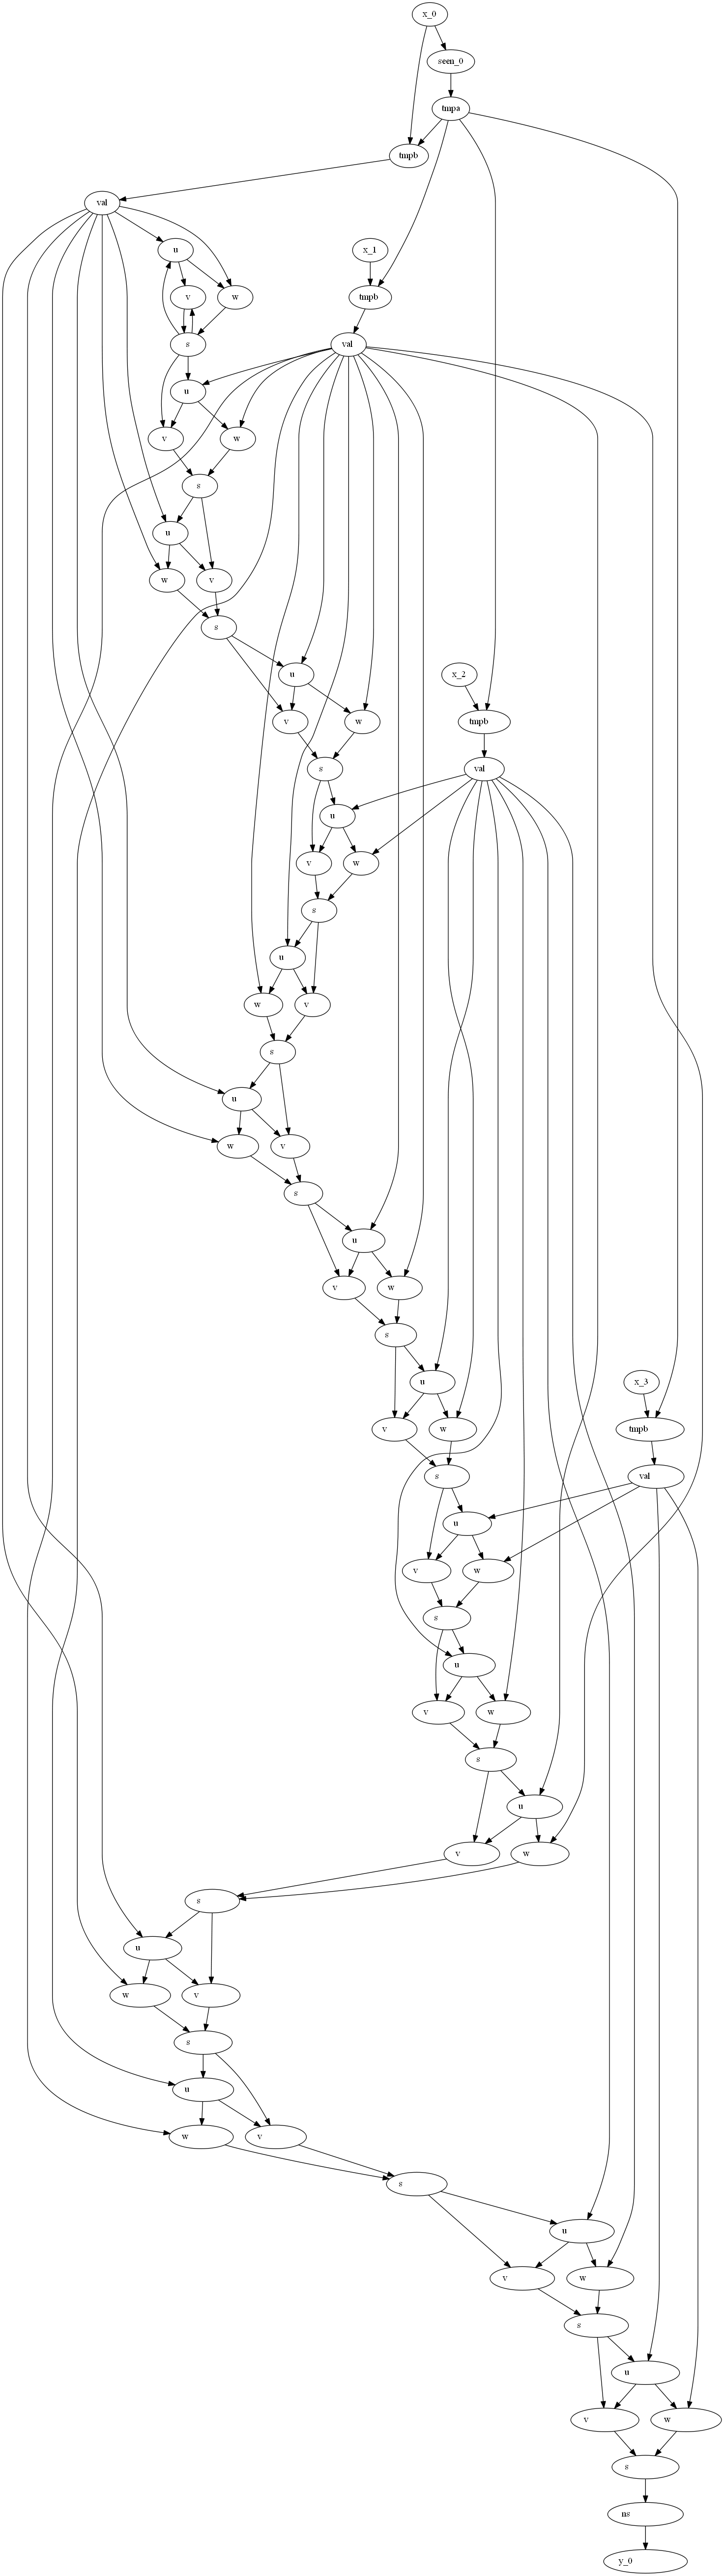

In [135]:
draw_graph(prog,"both")

### Utility code (run this first)

In [ ]:
%pylab

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 

In [ ]:
import graphviz
from graphviz import Graph
from graphviz import Digraph

In [ ]:
import networkx as nx

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

import math


In [ ]:
import pydotplus

def nxgraph(G):
    P = pydotplus.graph_from_dot_data(G.source)
    return nx.drawing.nx_pydot.from_pydot(P)


In [ ]:
# import matplotlib.cbook
# warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def NAND2Graph(P):
    n = max([int(var[2:]) for var in P.split() if var[:2]=='x_' ])+1 # no of inputs
    m = max([int(var[2:]) for var in P.split() if var[:2]=='y_' ])+1 # no of outputs
    nodes = {}
    
    def uniquenode(v):
        idx = nodes.setdefault(v,-1)
        nodes[v] = nodes[v]+1
        return v+(" "*(idx+1))
    
    def lastnode(v):
        idx = nodes.get(v,0)
        return v+(" "*idx)
        
    
    G = nx.DiGraph()
    for line in P.split('\n'):
        if not line or line[0]=='#' or line[0]=='//': continue # ignore empty and commented out lines
        (var1,assign,var2,op,var3) = line.split()
        var1 = uniquenode(var1)
        var2 = lastnode(var2)
        var3 = lastnode(var3)
        G.add_node(var1)
        G.add_edge(var2,var1)
        G.add_edge(var3,var1)
    
    return [G, [lastnode("y_"+str(j)) for j in range(m)]]
 
    
def EVALgraph(L,n,m,x):
    t = max([max(triple) for triple in L])+1
    s = len(L)
    
    avars = [0]*t
    avars[:n]=x
    values = [0]*(n+s+m)
    values[:n]=x

    l=0
    for (a,b,c) in L:
        avars[a] =  1-avars[b]*avars[c]
        values[l+n] = avars[a]
        l+=1
    
        
    y = avars[t-m:t]
    values[n+s:n+s+m] = y
    
    
    G = nx.DiGraph()
    
    
    def getnode(i):
        if i<n:
            return 'x_'+ str(i)+'='+str(values[i])
        elif i<n+s:
            return 'l_'+str(i-n)+"="+str(values[i])
        else:
            return 'y_'+str(i-n-s)+"="+str(values[i])
    
    lines = [getnode(i) for i in range(n+s)] 
    
    def last_written(var,l):
        if var<n:
            return var
        z = -1
        for i in range(l):
            if L[i][0]==var:
                z = i+n
        return z
    

    for node in lines:
        G.add_node(node)
    
    
    l = 0
    for (a,b,c) in L:
        in1 = last_written(b,l)
        in2 = last_written(c,l)
        
        if in1>=0:
            G.add_edge(lines[in1],lines[l+n])
        if in2>=0:
            G.add_edge(lines[in2],lines[l+n])
        l += 1
    
    for j in range(m):
        G.add_edge(lines[last_written(t-m+j,s)],getnode(n+s+j))
        
    return [G, [getnode(n+s+j) for j in range(m)]]

def draw_eval(prog,s,pruned="none"):
    x = [int(a) for a in s]
    [n,m,t] = params(prog)
    L =  triples(prog,n,m,t)
    [G,O] = EVALgraph(L,n,m,x)
    if pruned != "none":
        prune(G,O,pruned)
    return draw_DAG(G)
    

def draw_DAG(G):
    print(str(len(G.nodes()))+" nodes")
    D = nx.drawing.nx_pydot.to_pydot(G)
    png_str = D.create_png()
    return Image(data=png_str)


def draw_graph(prog,pruned="none"):
    [G,O] = NAND2Graph(prog)
    if pruned != "none":
        prune(G,O,pruned)
    return draw_DAG(G)

In [ ]:
def prune(G,O,pruned):
    
    if pruned in ["sinks","both"]:
        found = True
        while found:
            found = False
            nodes = G.nodes()
            for n in nodes:
                if len(G.successors(n))==0 and not(n in O):
                    G.remove_node(n)
                    found = True
                
    if pruned in ["merge","both"]:    
        found = True
        while found:
            found = False
            for n in G.nodes():
                for np in G.nodes():
                    if (n != np) and (np[0]!='x') and (set(G.predecessors(n))== set(G.predecessors(np))):
                        s = G.successors(np)
                        for a in s:
                            G.add_edge(n,a)
                        G.remove_node(np)
                        found = True
                        break
                if found:
                    break
    return G

In [ ]:
import networkx as nx

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

# import matplotlib.cbook
# warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

def NAND2Graph(P):
    n = max([int(var[2:]) for var in P.split() if var[:2]=='x_' ])+1 # no of inputs
    m = max([int(var[2:]) for var in P.split() if var[:2]=='y_' ])+1 # no of outputs
    nodes = {}
    
    def uniquenode(v):
        idx = nodes.setdefault(v,-1)
        nodes[v] = nodes[v]+1
        return v+(" "*(idx+1))
    
    def lastnode(v):
        idx = nodes.get(v,0)
        return v+(" "*idx)
        
    
    G = nx.DiGraph()
    for line in P.split('\n'):
        if not line or line[0]=='#' or line[0]=='//': continue # ignore empty and commented out lines
        (var1,assign,var2,op,var3) = line.split()
        var1 = uniquenode(var1)
        var2 = lastnode(var2)
        var3 = lastnode(var3)
        G.add_node(var1)
        G.add_edge(var2,var1)
        G.add_edge(var3,var1)
    
    return [G, [lastnode("y_"+str(j)) for j in range(m)]]
 
    
def EVALgraph(L,n,m,x):
    t = max([max(triple) for triple in L])+1
    s = len(L)
    
    avars = [0]*t
    avars[:n]=x
    values = [0]*(n+s+m)
    values[:n]=x

    l=0
    for (a,b,c) in L:
        avars[a] =  1-avars[b]*avars[c]
        values[l+n] = avars[a]
        l+=1
    
        
    y = avars[t-m:t]
    values[n+s:n+s+m] = y
    
    
    G = nx.DiGraph()
    
    
    def getnode(i):
        if i<n:
            return 'x_'+ str(i)+'='+str(values[i])
        elif i<n+s:
            return 'l_'+str(i-n)+"="+str(values[i])
        else:
            return 'y_'+str(i-n-s)+"="+str(values[i])
    
    lines = [getnode(i) for i in range(n+s)] 
    
    def last_written(var,l):
        if var<n:
            return var
        z = -1
        for i in range(l):
            if L[i][0]==var:
                z = i+n
        return z
    

    for node in lines:
        G.add_node(node)
    
    
    l = 0
    for (a,b,c) in L:
        in1 = last_written(b,l)
        in2 = last_written(c,l)
        
        if in1>=0:
            G.add_edge(lines[in1],lines[l+n])
        if in2>=0:
            G.add_edge(lines[in2],lines[l+n])
        l += 1
    
    for j in range(m):
        G.add_edge(lines[last_written(t-m+j,s)],getnode(n+s+j))
        
    return [G, [getnode(n+s+j) for j in range(m)]]

def draw_eval(prog,s,pruned="none"):
    x = [int(a) for a in s]
    [n,m,t] = params(prog)
    L =  triples(prog,n,m,t)
    [G,O] = EVALgraph(L,n,m,x)
    if pruned != "none":
        prune(G,O,pruned)
    return draw_DAG(G)
    

def draw_DAG(G):
    print(str(len(G.nodes()))+" nodes")
    D = nx.drawing.nx_pydot.to_pydot(G)
    png_str = D.create_png()
    return Image(data=png_str)

def display_graph(G):
    print(str(len(G.nodes()))+" nodes")
    D = nx.drawing.nx_pydot.to_pydot(G)
    png_str = D.create_png()
    return Image(data=png_str)



def draw_graph(prog,pruned="none"):
    [G,O] = NAND2Graph(prog)
    if pruned != "none":
        prune(G,O,pruned)
    return draw_DAG(G)

def prune(G,O,pruned):
    
    if pruned in ["sinks","both"]:
        found = True
        while found:
            found = False
            nodes = G.nodes()
            for n in nodes:
                if len(G.successors(n))==0 and not(n in O):
                    G.remove_node(n)
                    found = True
                
    if pruned in ["merge","both"]:    
        found = True
        while found:
            found = False
            for n in G.nodes():
                for np in G.nodes():
                    if (n != np) and (np[0]!='x') and (set(G.predecessors(n))== set(G.predecessors(np))):
                        s = G.successors(np)
                        for a in s:
                            G.add_edge(n,a)
                        G.remove_node(np)
                        found = True
                        break
                if found:
                    break
    return G